In [2]:
! python3 -m pip install --upgrade tensorrt
! pip3 install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17281 sha256=055cb554c81337084ecbeece43281f85702addd8902e31b0004f43a2fb65f518
  Stored in directory: /home/jovyan/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt


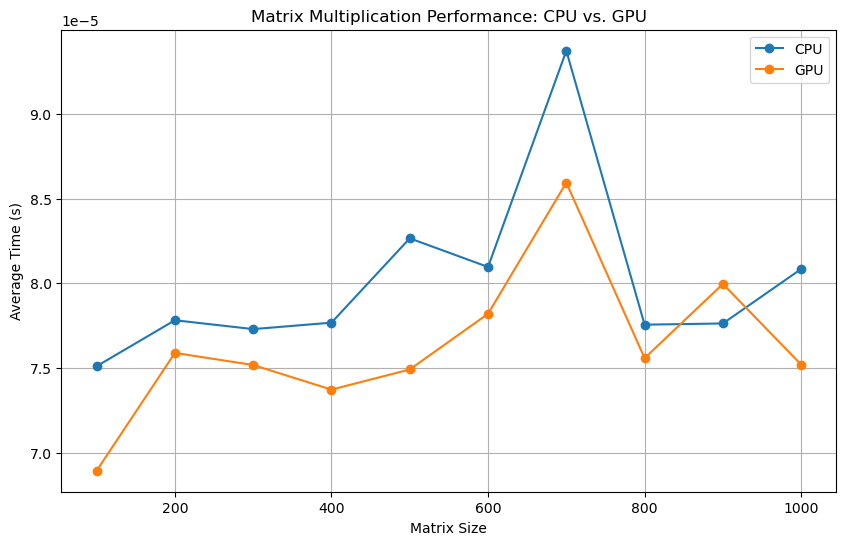

In [11]:
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

# Configuration
matrix_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
repeats = 10

cpu_times = []
gpu_times = []

for matrix_size in matrix_sizes:
    cpu_avg_time = 0
    gpu_avg_time = 0

    for _ in range(repeats):
        # Create random matrices
        matrix_a = tf.random.normal(shape=(matrix_size, matrix_size))
        matrix_b = tf.random.normal(shape=(matrix_size, matrix_size))

        # CPU matrix multiplication
        start_time = time.time()
        result_cpu = tf.matmul(matrix_a, matrix_b)
        end_time = time.time()
        cpu_avg_time += (end_time - start_time) / repeats

        # GPU matrix multiplication
        with tf.device('/GPU:0'):
            start_time = time.time()
            result_gpu = tf.matmul(matrix_a, matrix_b)
            end_time = time.time()
            gpu_avg_time += (end_time - start_time) / repeats

    cpu_times.append(cpu_avg_time)
    gpu_times.append(gpu_avg_time)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, cpu_times, marker='o', label='CPU')
plt.plot(matrix_sizes, gpu_times, marker='o', label='GPU')
plt.xlabel('Matrix Size')
plt.ylabel('Average Time (s)')
plt.title('Matrix Multiplication Performance: CPU vs. GPU')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Check if TensorFlow is using the GPU
print("TensorFlow is using GPU:", tf.test.is_gpu_available())

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50
batch_size = 16
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = tf.argmax(y_pred_probabilities, axis=1)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy (calculated):", test_accuracy)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
TensorFlow is using GPU: True


2023-10-01 19:19:51.595972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-01 19:19:51.596220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-01 19:19:51.596371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-01 19:19:51.596572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-01 19:19:51.596727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 1.0704 - accuracy: 0.5333
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.0321 - accuracy: 0.5667
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9970 - accuracy: 0.6000
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9635 - accuracy: 0.6167
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9300 - accuracy: 0.6333
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.9011 - accuracy: 0.6583
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.6667
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.6667
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.6750
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.7000
Epoch 11/50
8/8 [======================